# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python

## Beyond LDI

The LDI paradigm suggests that investor welfare should depend on how good each building block is at deliverying what is has been designed for.  Intuitively, the interaction between performance and hedging motives with each building block is also expected to play an important role.

There are strong improvement expected from aligning the performance-seeking portfolio with the liability-hedging portfolio unless this improvement comes with an exceedingly large opportunity cost in terms of risk-adjusted performance.

## Naive Risk Budgeting Strategies between the PSP and GHP

In [56]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

# %load_ext autoreload
# autoreload 2

## Portfolio Returns Generation with Fixed Mix Allocator
- Generate returns of asset 1 with scenarios N
- Generate returns of asset 2 with scenarios N
- Shape of the returns (both assets) should be the same
- fixedmix_allocator returns a matrix of weights w1 with shape same as the 2 returns matrix
- bt_mix returns the returns of the portfolio mix

In [57]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)

### Weights of the fixed mix allocator

In [58]:
weights = erk.fixedmix_allocator(rets_10, rets_30, w1=0.06)
print(weights.shape)
weights.head()

(120, 500)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
2,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
3,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
4,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
5,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


### Generating bond portfolio returns and statistics
- 60% 10-year bond + 40% 30-year bond

In [59]:
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator=erk.fixedmix_allocator, w1=0.06)
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.040804,0.006383,0.007096,3.383268,-0.00034,0.000634,1.647461,-0.002725


### Generating multi-asset class (stock & bond) portfolio returns and statistics

In [60]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [61]:
print(rets_eq.shape)
print(rets_bonds.shape)
print(rets_zc.shape)

(120, 500)
(120, 500)
(120, 500)


In [62]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis=1)
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.06005,0.005288,0.510867,3.783957,-0.002624,-0.001996,5.530921,0.0


In [63]:
summaries = erk.summary_stats(rets_7030b)
summaries.head()

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.072117,0.116049,-0.079145,3.178014,0.049126,0.066765,0.353091,-0.118580
1,0.066075,0.111374,0.059631,3.016824,0.046251,0.059761,0.315127,-0.326280
2,0.079203,0.116326,-0.199006,3.134385,0.049850,0.068864,0.411540,-0.174621
3,0.101294,0.123771,0.037526,2.764037,0.049613,0.062400,0.560500,-0.116362
4,0.036197,0.118379,-0.039535,2.357680,0.053252,0.061436,0.050803,-0.263917


In [64]:
summaries.mean()

Annualized Return          0.054059
Annualized Vol             0.111929
Skewness                   0.012750
Kurtosis                   2.941404
Cornish-Fisher VaR (5%)    0.047947
Historic CVaR (5%)         0.060407
Sharpe Ratio               0.211596
Max Drawdown              -0.218124
dtype: float64

## Portfolio Terminal Values

In [65]:
pd.concat([
    erk.terminal_stats(rets_bonds, name='FI'),
    erk.terminal_stats(rets_eq, name='Eq'),
    erk.terminal_stats(rets_7030b, name='70/30')
],axis=1)

,FI,Eq,70/30
mean,1.399815,1.923813,1.777415
std,0.282601,0.885772,0.584793
p_breach,0.016000,0.054000,0.012000
e_short,0.088788,0.122988,0.118525
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


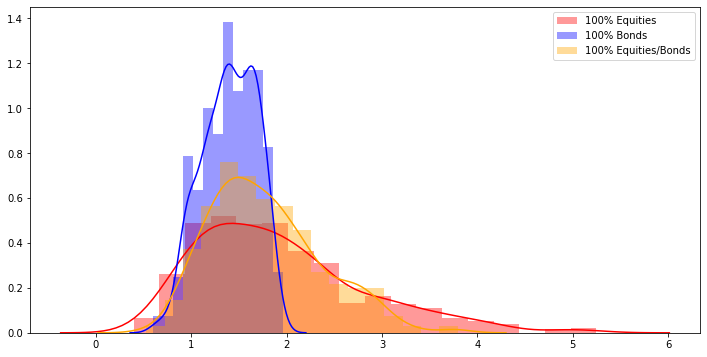

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.distplot(erk.terminal_values(rets_eq), color='red', label="100% Equities")
sns.distplot(erk.terminal_values(rets_bonds), color='blue', label="100% Bonds")
sns.distplot(erk.terminal_values(rets_7030b), color='orange', label="100% Equities/Bonds")
plt.legend()
plt.show()

## Portfolio Returns Generation with Glide Paths Allocation

In [67]:
weights = erk.glidepath_allocator(rets_10, rets_30, start_glide=0.80, end_glide=0.20)
print(weights.shape)
weights.head()

(120, 500)


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,...,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
2,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,...,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958,0.794958
3,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,...,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916,0.789916
4,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,...,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874,0.784874
5,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,...,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832,0.779832


In [68]:
weights.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
116,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,...,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168,0.220168
117,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,...,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126,0.215126
118,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,...,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084,0.210084
119,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,...,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042,0.205042
120,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


### Generating multi-asset class (stock & bond) portfolio returns and statistics
- with glider weights

Note that there is still a probability that the terminal value is below the floor and expected shortfall greater than zero.

In [69]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.glidepath_allocator, start_glide=0.80, end_glide=0.20)
pd.concat([
    erk.terminal_stats(rets_bonds, name='FI'),
    erk.terminal_stats(rets_eq, name='Eq'),
    erk.terminal_stats(rets_7030b, name='70/30'),
    erk.terminal_stats(rets_g8020, name='Glide 80 to 20')
],axis=1)

,FI,Eq,70/30,Glide 80 to 20
mean,1.399815,1.923813,1.777415,1.695452
std,0.282601,0.885772,0.584793,0.473640
p_breach,0.016000,0.054000,0.012000,0.010000
e_short,0.088788,0.122988,0.118525,0.112651
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN
